In [24]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [25]:
# read csv 
ad_clicks = pd.read_csv('csv/ad_clicks.csv')
ad_clicks.head(5)

,user_id,utm_source,day,ad_click_timestamp,experimental_group
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,7:18,A
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B


In [4]:
# source pages and how many related users 
views = ad_clicks.groupby('utm_source').user_id.count().reset_index().sort_values(by=['user_id']).reset_index(drop=True)
views

,utm_source,user_id
0,twitter,215
1,email,255
2,facebook,504
3,google,680


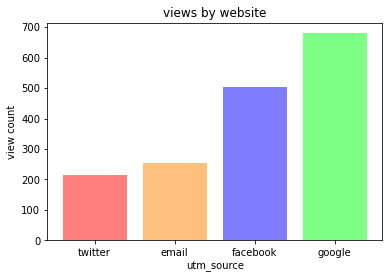

In [47]:
# visualize views
x = views['utm_source']
y = views['user_id']
plt.bar(x, y,color = ["#ff7f7d", "#ffc07d", "#817dff", "#7dff86"])
plt.xlabel("utm_source")
plt.ylabel("view count")
plt.title("views by website")
plt.show()

Google and facebook give the most views.

In [6]:
# add column if there was a click or not. If a timestamp was collected (not NaN), then True
ad_clicks['is_click'] = ad_clicks.ad_click_timestamp.notnull()
ad_clicks

,user_id,utm_source,day,ad_click_timestamp,experimental_group,is_click
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,7:18,A,True
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B,False
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A,False
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B,False
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B,False
...,...,...,...,...,...,...
1649,fe8b5236-78f6-4192-9da6-a76bba67cfe6,twitter,7 - Sunday,NaN,A,False
1650,fed3db6d-8c92-40e3-a4fb-1fb9d7337eb1,facebook,5 - Friday,NaN,B,False
1651,ff3a22ff-521c-478c-87ca-7dc7b8f34372,twitter,3 - Wednesday,NaN,B,False
1652,ff3af0d6-b092-4c4d-9f2e-2bdd8f7c0732,google,1 - Monday,22:57,A,True


In [7]:
# aggregate by source page and is_click - how many users at page clicked on ad
clicks_by_source = ad_clicks.groupby(['utm_source','is_click']).user_id.count().reset_index()
clicks_by_source

,utm_source,is_click,user_id
0,email,False,175
1,email,True,80
2,facebook,False,324
3,facebook,True,180
4,google,False,441
5,google,True,239
6,twitter,False,149
7,twitter,True,66


In [8]:
# pivotting clicks_by_source
clicks_pivot = clicks_by_source.pivot(index='utm_source',columns='is_click' ,values='user_id').reset_index()
clicks_pivot

is_click,utm_source,False,True
0,email,175,80
1,facebook,324,180
2,google,441,239
3,twitter,149,66


In [9]:
# add percentage of clicks
clicks_pivot.columns=['utm_source','clicked','not_clicked']
clicks_pivot['percent_clicked'] = clicks_pivot['clicked']/(clicks_pivot['clicked']+ clicks_pivot['not_clicked'])*100
clicks_pivot

,utm_source,clicked,not_clicked,percent_clicked
0,email,175,80,68.627451
1,facebook,324,180,64.285714
2,google,441,239,64.852941
3,twitter,149,66,69.302326


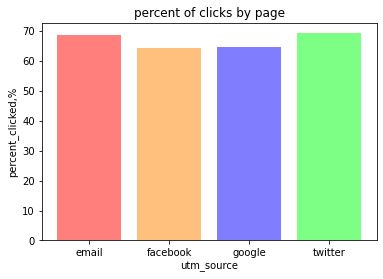

In [49]:
# visualize previous result
x = clicks_pivot['utm_source']
y = clicks_pivot['percent_clicked']
plt.bar(x, y,color = ["#ff7f7d", "#ffc07d", "#817dff", "#7dff86"])
plt.xlabel("utm_source")
plt.ylabel("percent_clicked,%")
plt.title("percent of clicks by page")
plt.show()

Email and twitter have the biggest percent of clicks.

In [17]:
# how many records are related to ad A and B ?
experimental_group_count = ad_clicks.groupby('experimental_group').user_id.count().reset_index()
experimental_group_count

,experimental_group,user_id
0,A,827
1,B,827


In [15]:
#8
experimental_group_count_click = ad_clicks.groupby(['experimental_group','is_click']).user_id.count().reset_index()
experimental_group_count_click_pivot = experimental_group_count_click.pivot(index='experimental_group',
                                                                            columns='is_click'  ,
                                                                            values='user_id').reset_index()
experimental_group_count_click_pivot['percent_clicked'] = experimental_group_count_click_pivot[True]/ \
                (experimental_group_count_click_pivot[True]+experimental_group_count_click_pivot[False])
experimental_group_count_click_pivot

is_click,experimental_group,False,True,percent_clicked
0,A,517,310,0.374849
1,B,572,255,0.308343


In [18]:
# split dataset to A and B ads
a_clicks = ad_clicks[ad_clicks.experimental_group == 'A']
b_clicks = ad_clicks[ad_clicks.experimental_group == 'B']

In [21]:
# A - percentage of clicks by day of week
a_clicks_day = a_clicks.groupby(['day','is_click']).user_id.count().reset_index()
a_clicks_day_pivot = a_clicks_day.pivot(index='day',columns='is_click',values='user_id')
a_clicks_day_pivot['percent_clicked'] = a_clicks_day_pivot[True]/(a_clicks_day_pivot[True]+a_clicks_day_pivot[False])
a_clicks_day_pivot

is_click,False,True,percent_clicked
day,,,
1 - Monday,70,43,0.380531
2 - Tuesday,76,43,0.361345
3 - Wednesday,86,38,0.306452
4 - Thursday,69,47,0.405172
5 - Friday,77,51,0.398438
6 - Saturday,73,45,0.381356
7 - Sunday,66,43,0.394495


In [22]:
# B - percentage of clicks by day of the week
b_clicks_day = b_clicks.groupby(['day','is_click']).user_id.count().reset_index()
b_clicks_day_pivot = b_clicks_day.pivot(index='day',columns='is_click',values='user_id')
b_clicks_day_pivot['percent_clicked'] = b_clicks_day_pivot[True]/(b_clicks_day_pivot[True]+b_clicks_day_pivot[False])
b_clicks_day_pivot

is_click,False,True,percent_clicked
day,,,
1 - Monday,81,32,0.283186
2 - Tuesday,74,45,0.378151
3 - Wednesday,89,35,0.282258
4 - Thursday,87,29,0.250000
5 - Friday,90,38,0.296875
6 - Saturday,76,42,0.355932
7 - Sunday,75,34,0.311927


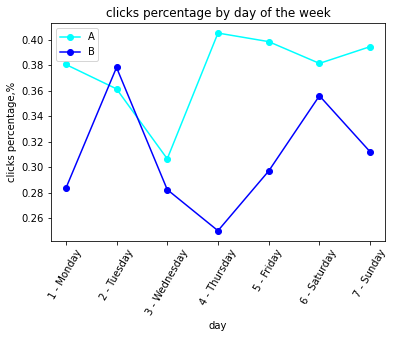

In [48]:
# plot percentage of clicks by day of the week for A and B
x = a_clicks_day_pivot.index
y1 = a_clicks_day_pivot['percent_clicked']
y2 = b_clicks_day_pivot['percent_clicked']

plt.title("clicks percentage by day of the week")
plt.xlabel("day")
plt.xticks(rotation = 60)
plt.ylabel("clicks percentage,%")

plt.plot(x,y1, c = "cyan", marker = "o",label='A')
plt.plot(x,y2, c = "blue", marker = "o",label='B')
plt.legend(loc="upper left")
plt.show()

The ad banner A is doing better job than banner B through the week!